In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file
import io
df = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

Saving advertising.csv to advertising.csv
Dataset Shape: (200, 4)

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.3

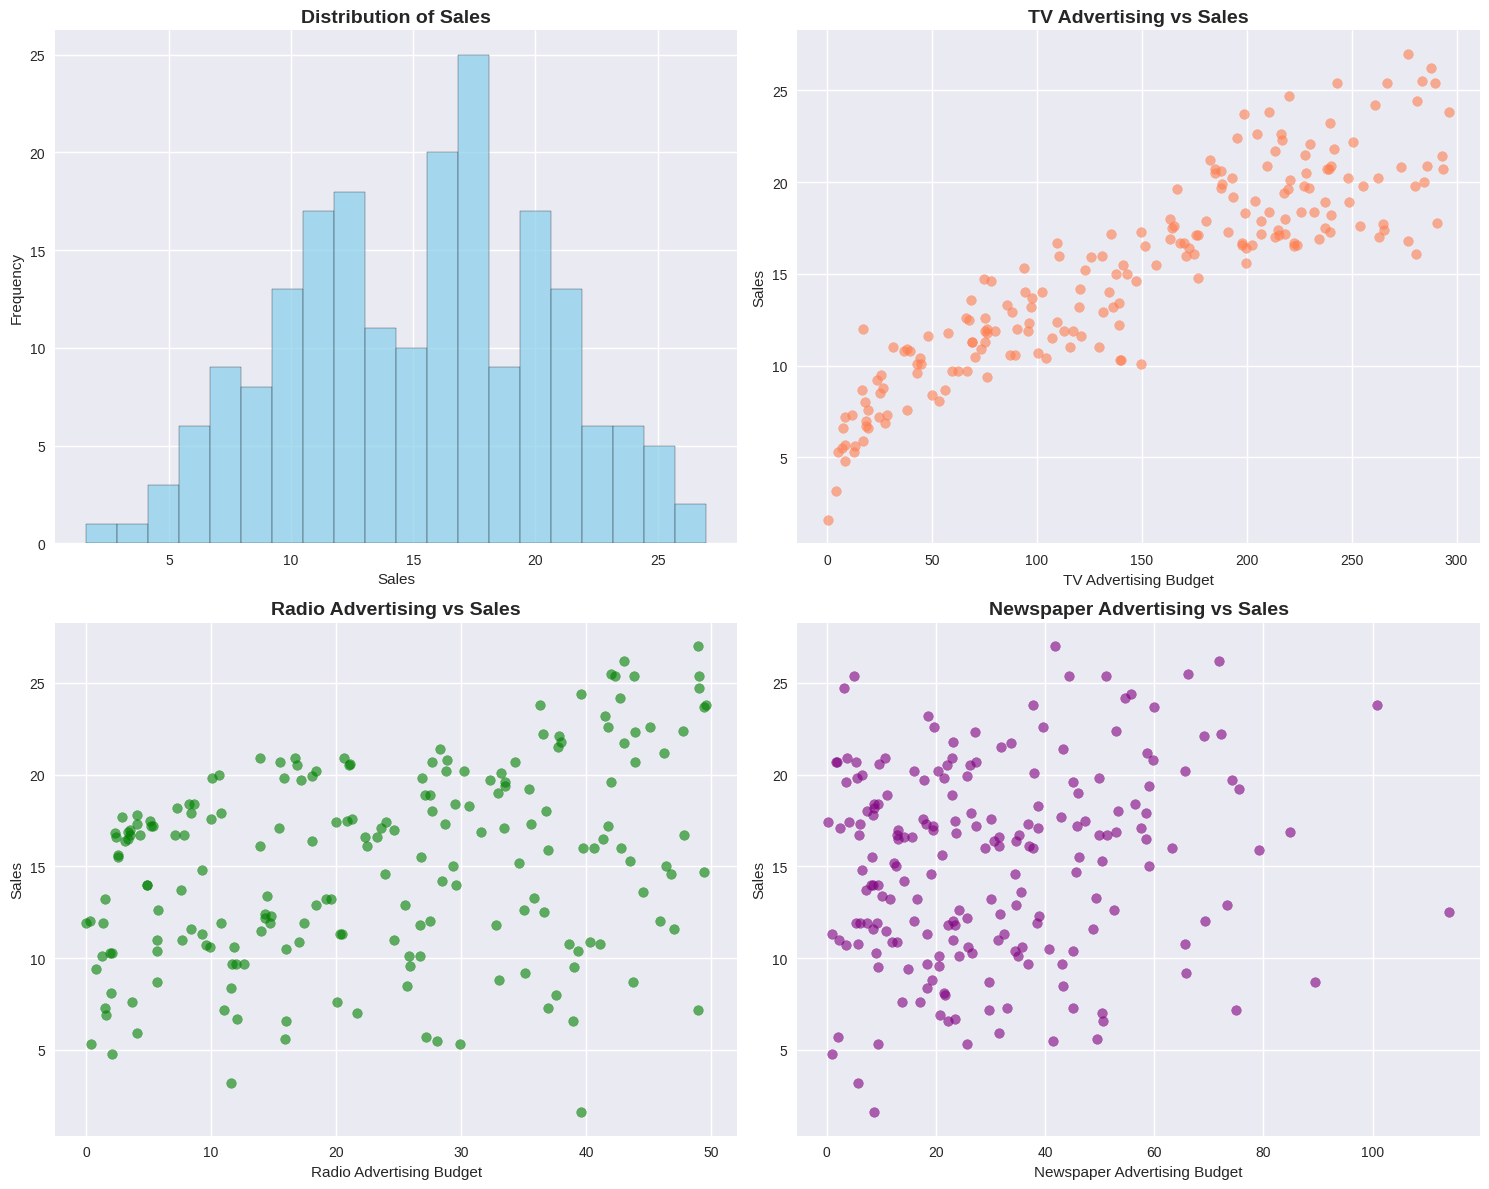

In [ ]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of Sales
axes[0,0].hist(df['Sales'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Sales', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Sales')
axes[0,0].set_ylabel('Frequency')

# TV vs Sales
axes[0,1].scatter(df['TV'], df['Sales'], alpha=0.6, color='coral')
axes[0,1].set_title('TV Advertising vs Sales', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('TV Advertising Budget')
axes[0,1].set_ylabel('Sales')

# Radio vs Sales
axes[1,0].scatter(df['Radio'], df['Sales'], alpha=0.6, color='green')
axes[1,0].set_title('Radio Advertising vs Sales', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Radio Advertising Budget')
axes[1,0].set_ylabel('Sales')

# Newspaper vs Sales
axes[1,1].scatter(df['Newspaper'], df['Sales'], alpha=0.6, color='purple')
axes[1,1].set_title('Newspaper Advertising vs Sales', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Newspaper Advertising Budget')
axes[1,1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

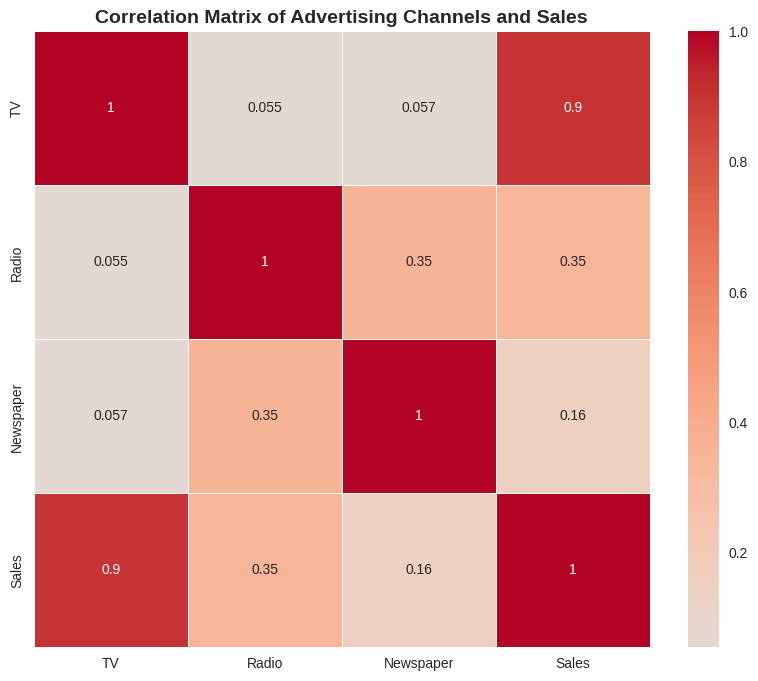

<Figure size 1200x800 with 0 Axes>

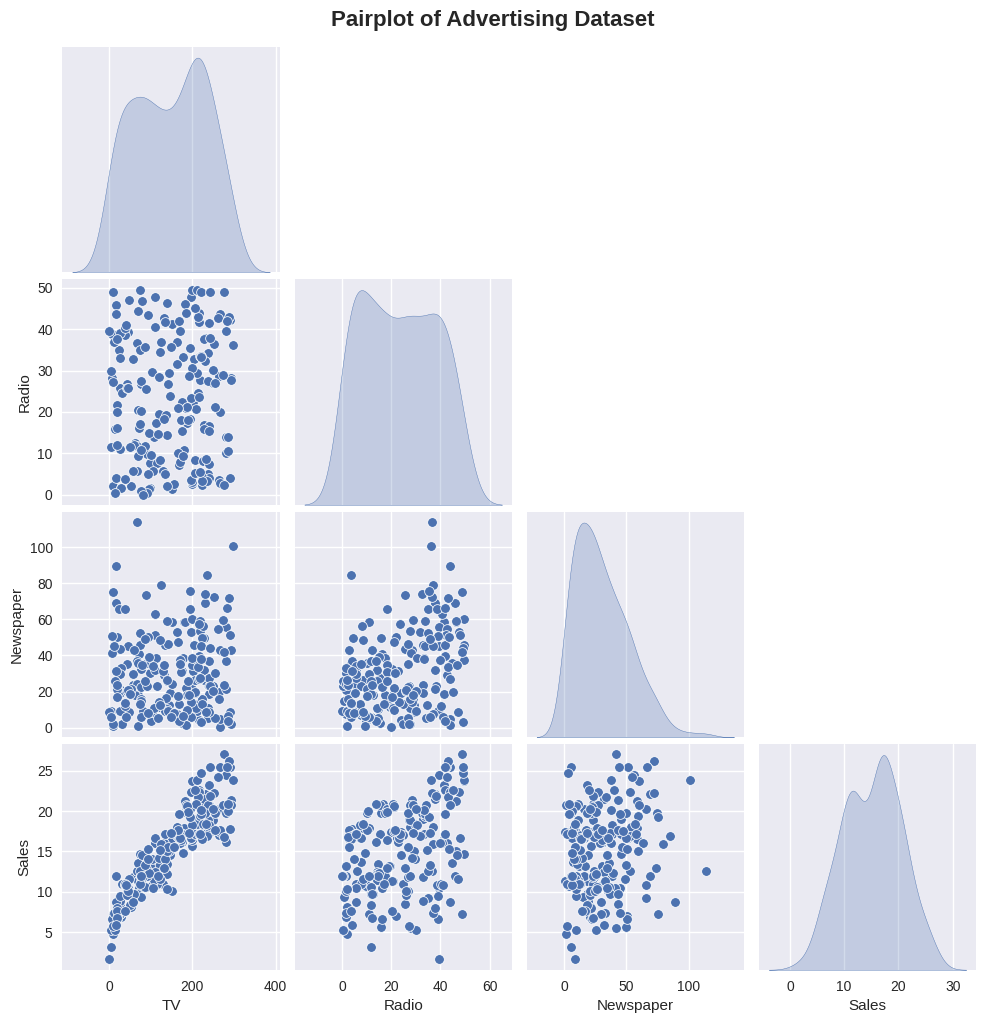

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Advertising Channels and Sales',
          fontsize=14, fontweight='bold')
plt.show()

# Pairplot to visualize relationships
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Advertising Dataset', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Separate features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Feature matrix shape: (200, 3)
Target variable shape: (200,)
Training set: 160 samples
Testing set: 40 samples


In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

    print(f"{name} Results:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 50)

Training Linear Regression...
Linear Regression Results:
  MAE: 1.2748
  MSE: 2.9078
  RMSE: 1.7052
  R² Score: 0.9059
--------------------------------------------------
Training Random Forest...
Random Forest Results:
  MAE: 0.9180
  MSE: 1.4374
  RMSE: 1.1989
  R² Score: 0.9535
--------------------------------------------------


Model Comparison:
               Model       MAE      RMSE        R²
0  Linear Regression  1.274826  1.705215  0.905901
1      Random Forest  0.918000  1.198930  0.953483


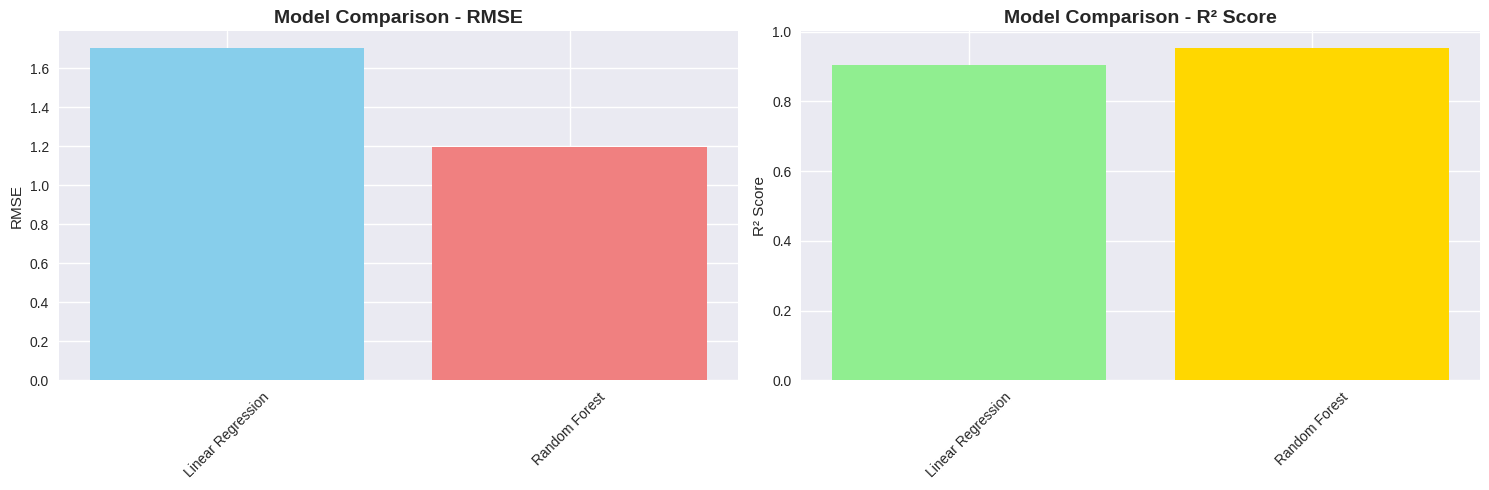

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[model]['mae'] for model in results],
    'RMSE': [results[model]['rmse'] for model in results],
    'R²': [results[model]['r2'] for model in results]
})

print("Model Comparison:")
print(comparison_df)

# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for RMSE comparison
axes[0].bar(comparison_df['Model'], comparison_df['RMSE'], color=['skyblue', 'lightcoral'])
axes[0].set_title('Model Comparison - RMSE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for R² comparison
axes[1].bar(comparison_df['Model'], comparison_df['R²'], color=['lightgreen', 'gold'])
axes[1].set_title('Model Comparison - R² Score', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Best Model: Random Forest


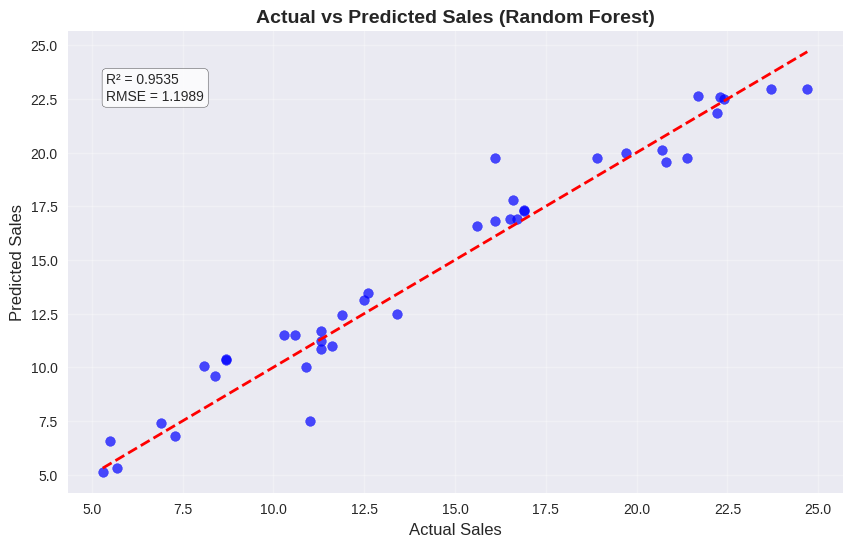

In [ ]:
# Get the best model (based on R² score)
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.title(f'Actual vs Predicted Sales ({best_model_name})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add metrics to plot
metrics_text = f'R² = {results[best_model_name]["r2"]:.4f}\nRMSE = {results[best_model_name]["rmse"]:.4f}'
plt.annotate(metrics_text, xy=(0.05, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.show()

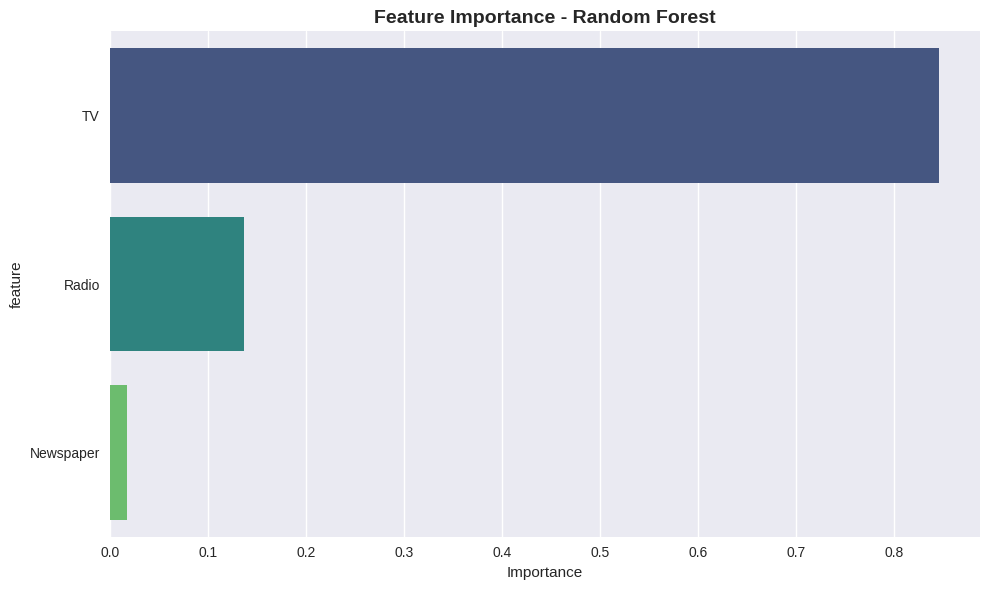

Feature Importance:
     feature  importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


In [ ]:
# Feature importance for Random Forest
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("Feature Importance:")
    print(feature_importance)
else:
    # For Linear Regression, show coefficients
    coefficients = pd.DataFrame({
        'feature': ['Intercept'] + list(X.columns),
        'coefficient': [best_model.intercept_] + list(best_model.coef_)
    })
    print("Linear Regression Coefficients:")
    print(coefficients)

In [ ]:
# Function to make predictions
def predict_sales(tv_budget, radio_budget, newspaper_budget):
    """
    Predict sales based on advertising budgets

    Parameters:
    tv_budget (float): TV advertising budget
    radio_budget (float): Radio advertising budget
    newspaper_budget (float): Newspaper advertising budget

    Returns:
    float: Predicted sales
    """
    # Create input array
    input_data = np.array([[tv_budget, radio_budget, newspaper_budget]])

    # Make prediction
    prediction = best_model.predict(input_data)

    return prediction[0]

# Example predictions
print("Example Predictions:")
print("-" * 40)

examples = [
    (200, 40, 30),
    (100, 20, 10),
    (300, 50, 40),
    (50, 30, 20)
]

for i, (tv, radio, newspaper) in enumerate(examples, 1):
    predicted_sales = predict_sales(tv, radio, newspaper)
    print(f"Example {i}: TV=${tv}, Radio=${radio}, Newspaper=${newspaper}")
    print(f"  Predicted Sales: ${predicted_sales:.2f}")
    print()

# Interactive prediction
print("Interactive Prediction:")
print("-" * 30)
try:
    tv_input = float(input("Enter TV advertising budget: "))
    radio_input = float(input("Enter Radio advertising budget: "))
    newspaper_input = float(input("Enter Newspaper advertising budget: "))

    sales_pred = predict_sales(tv_input, radio_input, newspaper_input)
    print(f"\nPredicted Sales: ${sales_pred:.2f}")
except:
    print("Please enter valid numerical values")

Example Predictions:
----------------------------------------
Example 1: TV=$200, Radio=$40, Newspaper=$30
  Predicted Sales: $20.93

Example 2: TV=$100, Radio=$20, Newspaper=$10
  Predicted Sales: $12.83

Example 3: TV=$300, Radio=$50, Newspaper=$40
  Predicted Sales: $26.05

Example 4: TV=$50, Radio=$30, Newspaper=$20
  Predicted Sales: $10.72

Interactive Prediction:
------------------------------
Enter TV advertising budget: 25000
Enter Radio advertising budget: 30000
Enter Newspaper advertising budget: 100000

Predicted Sales: $26.06


In [ ]:
import joblib
import json

# Save the best model
model_filename = 'sales_prediction_model.pkl'
joblib.dump(best_model, model_filename)

# Save model metrics
metrics = {
    'best_model': best_model_name,
    'r2_score': float(results[best_model_name]['r2']),
    'rmse': float(results[best_model_name]['rmse']),
    'mae': float(results[best_model_name]['mae'])
}

with open('model_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

# Download files
files.download(model_filename)
files.download('model_metrics.json')

print("Model and metrics saved successfully!")
print(f"Best model: {best_model_name}")
print(f"R² Score: {metrics['r2_score']:.4f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model and metrics saved successfully!
Best model: Random Forest
R² Score: 0.9535


In [13]:
print("SALES PREDICTION MODEL - SUMMARY")
print("=" * 50)

print("\n📊 DATASET OVERVIEW:")
print(f"• Total samples: {len(df)}")
print(f"• Features: TV, Radio, Newspaper Advertising")
print(f"• Target: Sales")

print("\n🔍 KEY INSIGHTS:")
print("• TV advertising shows the strongest correlation with sales")
print("• Radio advertising also has significant impact")
print("• Newspaper advertising has weaker correlation")

print(f"\n🤖 BEST PERFORMING MODEL: {best_model_name}")
print(f"• R² Score: {results[best_model_name]['r2']:.4f}")
print(f"• RMSE: {results[best_model_name]['rmse']:.4f}")
print(f"• MAE: {results[best_model_name]['mae']:.4f}")

print("\n💡 BUSINESS IMPLICATIONS:")
print("• Optimize TV advertising budget for maximum ROI")
print("• Maintain balanced spending across channels")
print("• Use model for budget allocation decisions")

print("\n✅ MODEL CAN BE USED FOR:")
print("• Forecasting future sales based on advertising plans")
print("• Budget optimization across different media channels")
print("• Strategic planning and resource allocation")

SALES PREDICTION MODEL - SUMMARY

📊 DATASET OVERVIEW:
• Total samples: 200
• Features: TV, Radio, Newspaper Advertising
• Target: Sales

🔍 KEY INSIGHTS:
• TV advertising shows the strongest correlation with sales
• Radio advertising also has significant impact
• Newspaper advertising has weaker correlation

🤖 BEST PERFORMING MODEL: Random Forest
• R² Score: 0.9535
• RMSE: 1.1989
• MAE: 0.9180

💡 BUSINESS IMPLICATIONS:
• Optimize TV advertising budget for maximum ROI
• Maintain balanced spending across channels
• Use model for budget allocation decisions

✅ MODEL CAN BE USED FOR:
• Forecasting future sales based on advertising plans
• Budget optimization across different media channels
• Strategic planning and resource allocation
